The objective of the dataset is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. The datasets consists of several medical predictor variables and one target variable, Outcome.

**IMPORT LIBRARIES AND DATASET**

In [1]:
#import libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import dataset
data=pd.read_csv("diabetes.csv")

**DESCRIPTIVE STATISTICS**

In [3]:
#preview data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#dataset dimension
data.shape

(768, 9)

In [5]:
# Statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
# Count of null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**DATA VISULIZATION**

<AxesSubplot:xlabel='Outcome', ylabel='count'>

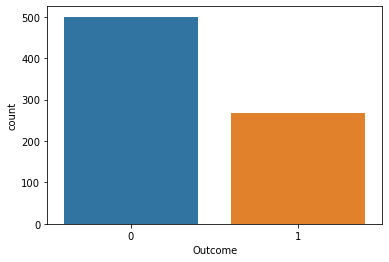

In [7]:
# Outcome countplot
sns.countplot(data['Outcome'],label="Count")

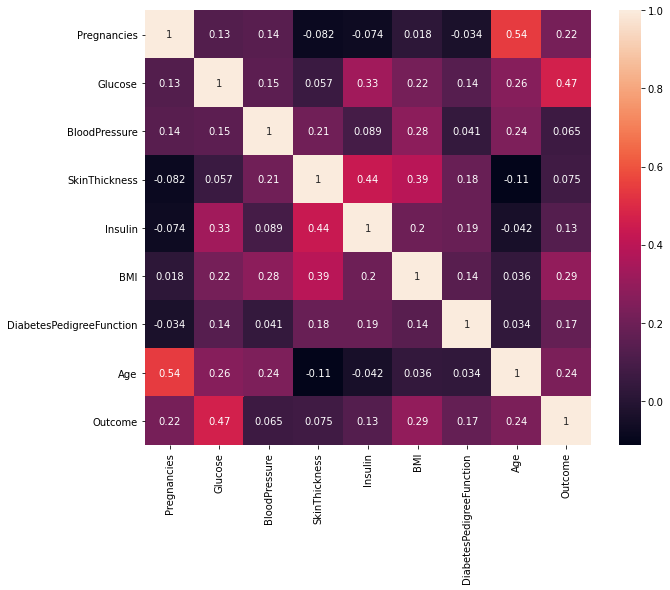

In [8]:
# Heatmap
plt.rcParams['figure.figsize'] = [10, 8]
sns.heatmap(data.corr(), annot=True)
plt.show()

**Data Preprocessing**

From the dataset there are no NaN values but that doesn't mean no zero values,in the dataset NaN values are in the form Zeroes (by looking at dataset we can see zeroes in Skin_thickness,Insulin as skin_thickness can not be zero)so we have to replace zeroes with NaN. 

In [7]:
# Replacing zero values with NaN
data_new=data
data_new.iloc[:,1:6]=data_new.iloc[:,1:6].replace(0,np.NaN)

In [8]:
# Count of NaN
data_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Loading data to new variable data_imp and replacing all NaN values in Glucose,BloodPressure,SkinThickness,Insulin,BMI with mean values of it's repective column

In [9]:
#Replacing NaN with Mean values
data_imp=data_new.iloc[:,:].values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
imputer.fit(data_imp[:, 1:])
data_imp[:, 1:] = imputer.transform(data_imp[:, 1:])

In [10]:
# Selecting features
X=data_imp[:,:-1]
y=data_imp[:,-1]

In [11]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (154,)
y_test shape: (154,)


**DATA MODELLING**

In [13]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [14]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [15]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [16]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

**MODEL EVALUATION**

In [17]:
# Evaluating using accuracy_score metric
accuracy_svc=svc.score(X_test,y_test)
accuracy_nb=nb.score(X_test,y_test)
accuracy_LR=LR.score(X_test,y_test)

In [18]:
# Accuracy on test set
print("Support Vector Classifier: ",accuracy_svc)
print("Naive Bayes: ",accuracy_nb)
print("Logistic Regression: ",accuracy_LR)

Support Vector Classifier:  0.8116883116883117
Naive Bayes:  0.7857142857142857
Logistic Regression:  0.8181818181818182


From above observation Logistics Regression and Support Vector Classifier are best model as they are giving the accuracy of 81%